In [2]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import statistics
import matplotlib.pyplot as plt

### Temat 1

1. Pobranie danych giełdowych np. ze strony https://finance.yahoo.com.

In [3]:
bitcoin = pd.read_csv('outfile3.csv',  index_col=0, parse_dates=True)

2. Stworzenie wykresu pobranych danych w skali liniowej i pół-logarytmicznej. 

Text(0.5, 0, 'Timestamp')

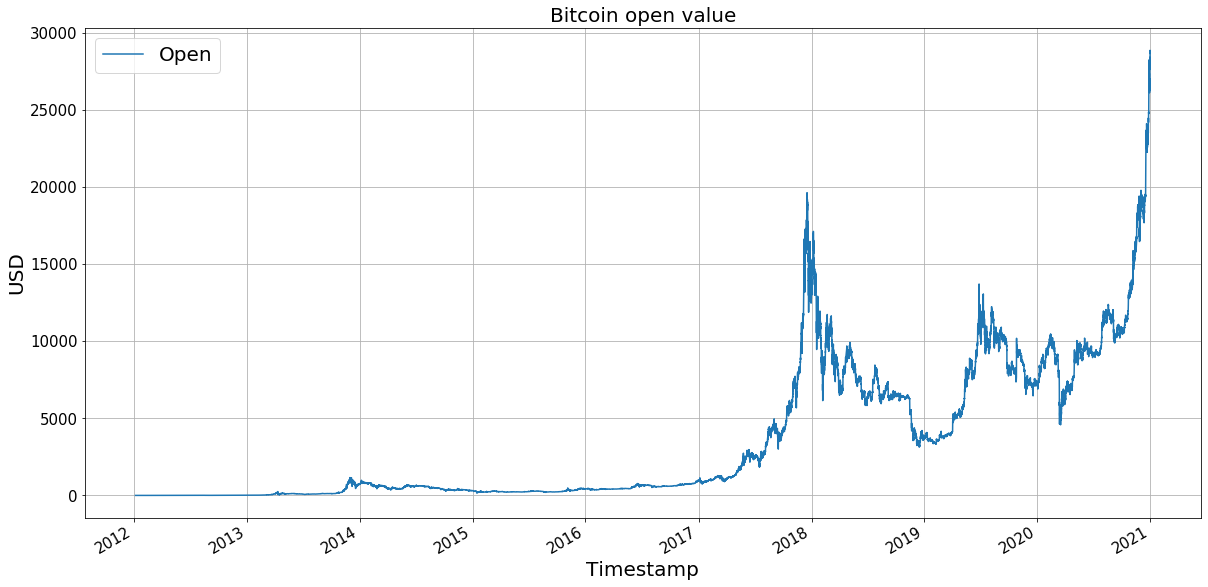

In [4]:
bitcoin.plot(y = 'Open', figsize=(20,10), title='Bitcoin open value', grid=True)
plt.ylabel("USD", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 20})
plt.title('Bitcoin open value', fontsize=20)
plt.xlabel("Timestamp", fontsize=20)

Text(0.5, 0, 'Timestamp')

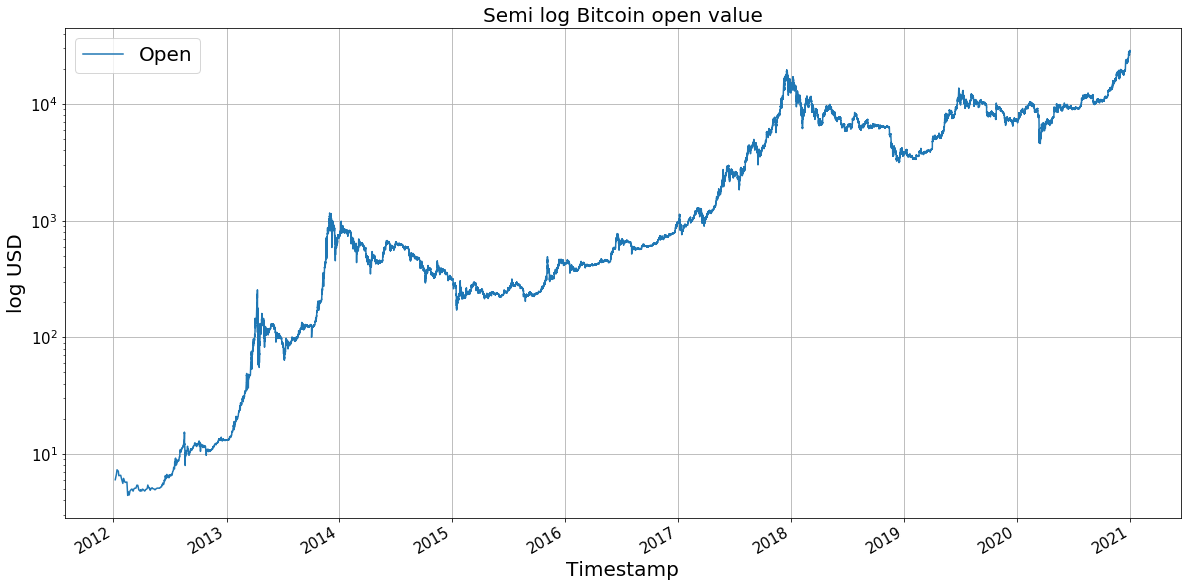

In [5]:
bitcoin.plot(y = 'Open', logy=True, figsize=(20,10), grid=True)
plt.ylabel("log USD", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 20})
plt.title('Semi log Bitcoin open value', fontsize=20)
plt.xlabel("Timestamp", fontsize=20)

3. Obliczenie  logarytmicznych  stóp  zwrotu (logarithmic  returns) pobranych  danych oraz stworzenie ich wykresu.

Text(0.5, 0, 'Timestamp')

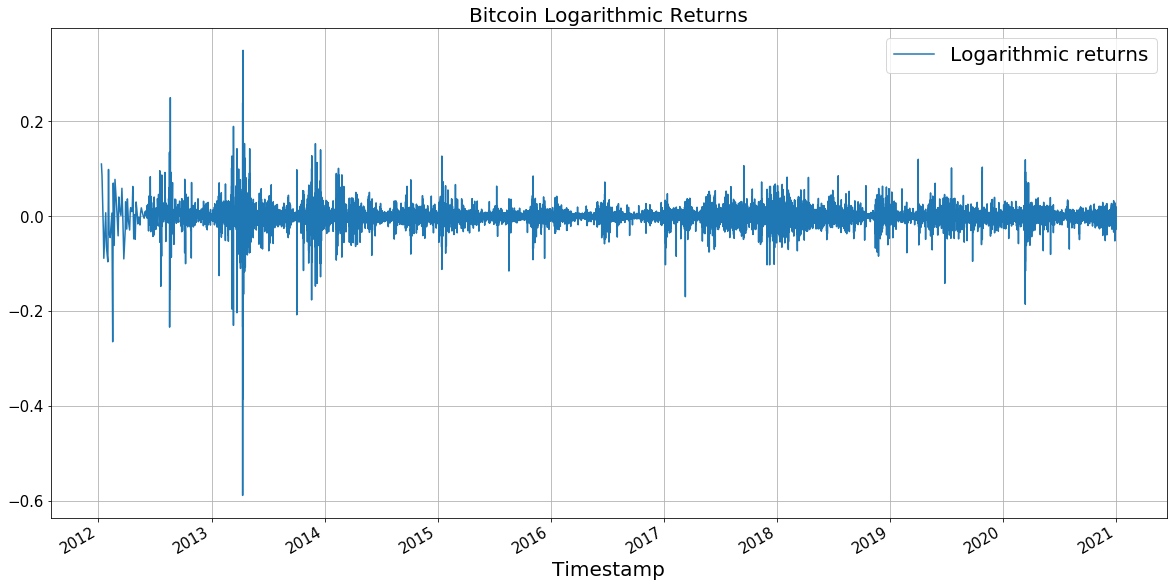

In [6]:
bitcoin['Logarithmic returns'] = np.log(bitcoin.Open) - np.log(bitcoin.Open.shift(1))
bitcoin.plot(y='Logarithmic returns', figsize=(20,10), grid=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 20})
plt.title('Bitcoin Logarithmic Returns', fontsize=20)
plt.xlabel("Timestamp", fontsize=20)

4. Znormalizowanie szeregu stóp zwrotu (średnia równa 0 i odchylenie standardowe 1).

In [7]:
print('Logarithmic returns mean: ', bitcoin['Logarithmic returns'].mean())
print('Logarithmic returns std: ', bitcoin['Logarithmic returns'].std())
print('Logarithmic returns min: ', bitcoin['Logarithmic returns'].min())
print('Logarithmic returns max: ', bitcoin['Logarithmic returns'].max())
bitcoin['Normalized logarithmic returns'] = (bitcoin['Logarithmic returns']-bitcoin['Logarithmic returns'].mean())/bitcoin['Logarithmic returns'].std()
print('Normalized logarithmic returns mean: ', bitcoin['Normalized logarithmic returns'].mean())
print('Normalized logarithmic returns std: ', bitcoin['Normalized logarithmic returns'].std())
print('Normalized logarithmic returns min: ', bitcoin['Normalized logarithmic returns'].min())
print('Normalized logarithmic returns max: ', bitcoin['Normalized logarithmic returns'].max())

Logarithmic returns mean:  0.000145900288601159
Logarithmic returns std:  0.012125030614687376
Logarithmic returns min:  -0.5877866649021186
Logarithmic returns max:  0.34980228537591707
Normalized logarithmic returns mean:  2.802419337860435e-17
Normalized logarithmic returns std:  1.0000000000000044
Normalized logarithmic returns min:  -48.48916129568706
Normalized logarithmic returns max:  28.83756719457415


5. Wyrysowanie danych.

Text(0.5, 0, 'Timestamp')

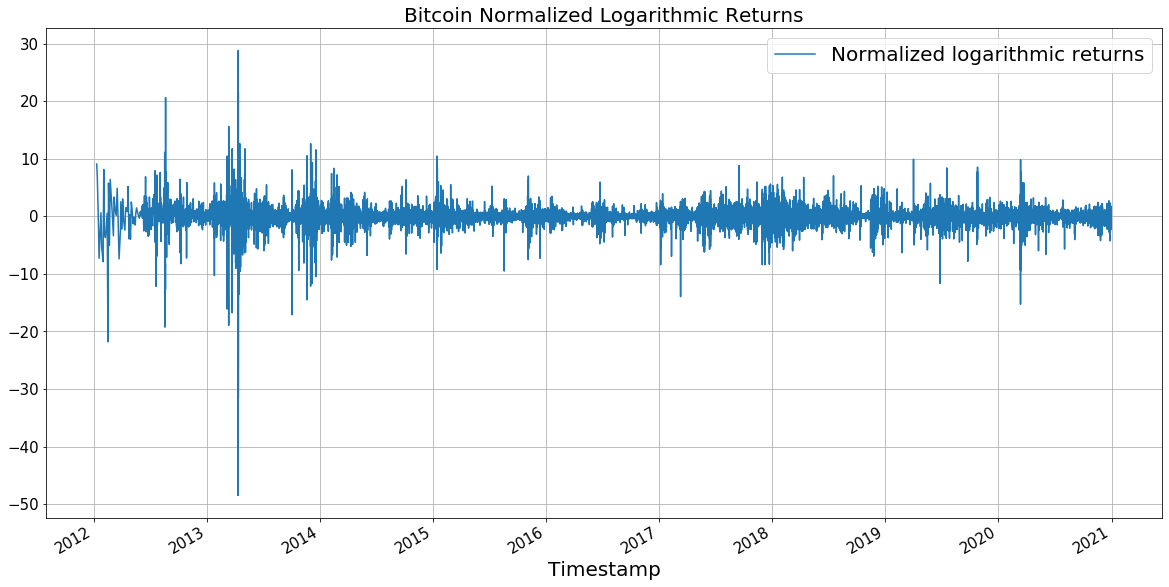

In [8]:
bitcoin.plot(y='Normalized logarithmic returns', figsize=(20,10), grid=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 20})
plt.title('Bitcoin Normalized Logarithmic Returns', fontsize=20)
plt.xlabel("Timestamp", fontsize=20)

### Temat 2

1. Wygenerowanie danych o rozkładzie normalnym (white noise).

In [9]:
mean = 0
std = 1
num_samples = bitcoin.index.size
samples = np.random.normal(mean, std, size=num_samples)
white_noise = pd.DataFrame(samples, index=bitcoin.index, columns=['White Noise'])

2. Stworzenie wykresu pobranych danych.

Text(0.5, 0, 'Timestamp')

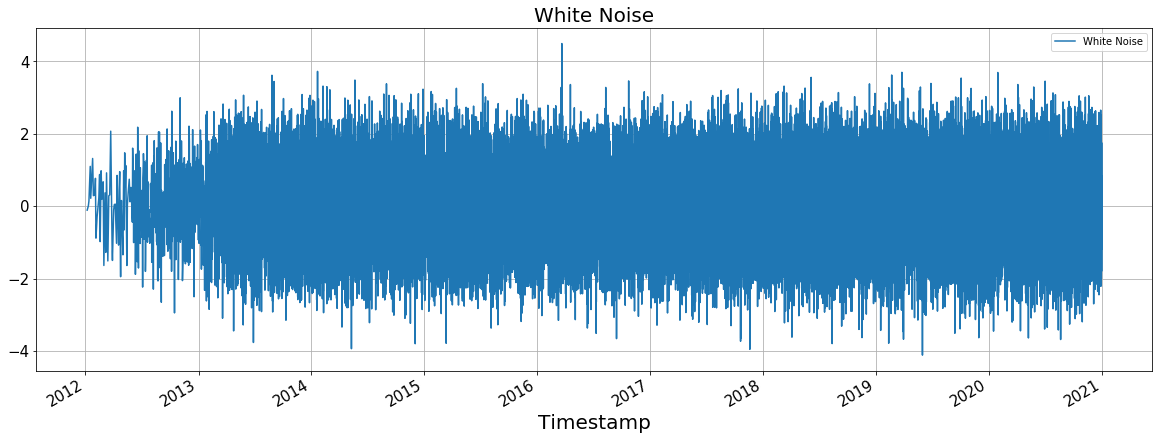

In [10]:
white_noise.plot(figsize=(20,7), title='White Noise', grid=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("White Noise", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)

3. Policzenie sumy skumulowanej (ruch Browna).

In [11]:
white_noise['Cumulative Sum'] = white_noise.cumsum()

4. Stworzenie wykresu dla sumy skumulowanej.

Text(0.5, 0, 'Timestamp')

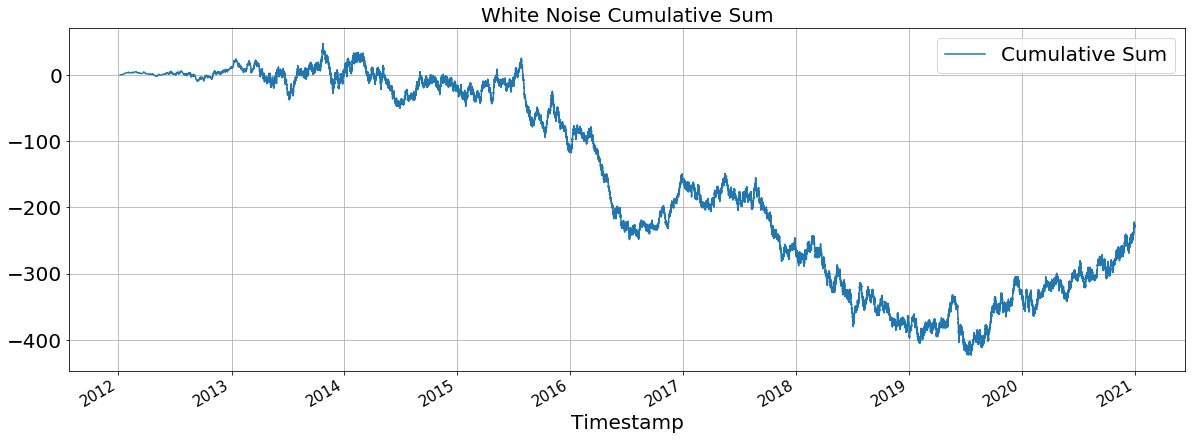

In [12]:
white_noise.plot(y='Cumulative Sum', figsize=(20,7), grid=True, fontsize=20)
plt.xticks(fontsize=15)
plt.legend(prop={'size': 20})
plt.title("White Noise Cumulative Sum", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)

### Temat 3

1. Dla danych giełdowych i wygenerowanych policzenie histogramów.
2. Znormalizowanie histogramów(suma wartości słupków powinna być równa 1).
3. Policzenie parametrów rozkładów(skośnościoraz kurtozy).
4. Przedstawienie obu znormalizowanych rozkładów na jednym wykresie. 
5. Policzenie rozkładu skumulowanego (1-dystrybuanta)  dla  modułu  fluktuacji (rozważyć oba szeregi).
6. Przedstawienie obu rozkładów skumulowanych na jednym wykresie(w skali log-log). 

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 <a list of 9 Text yticklabel objects>)

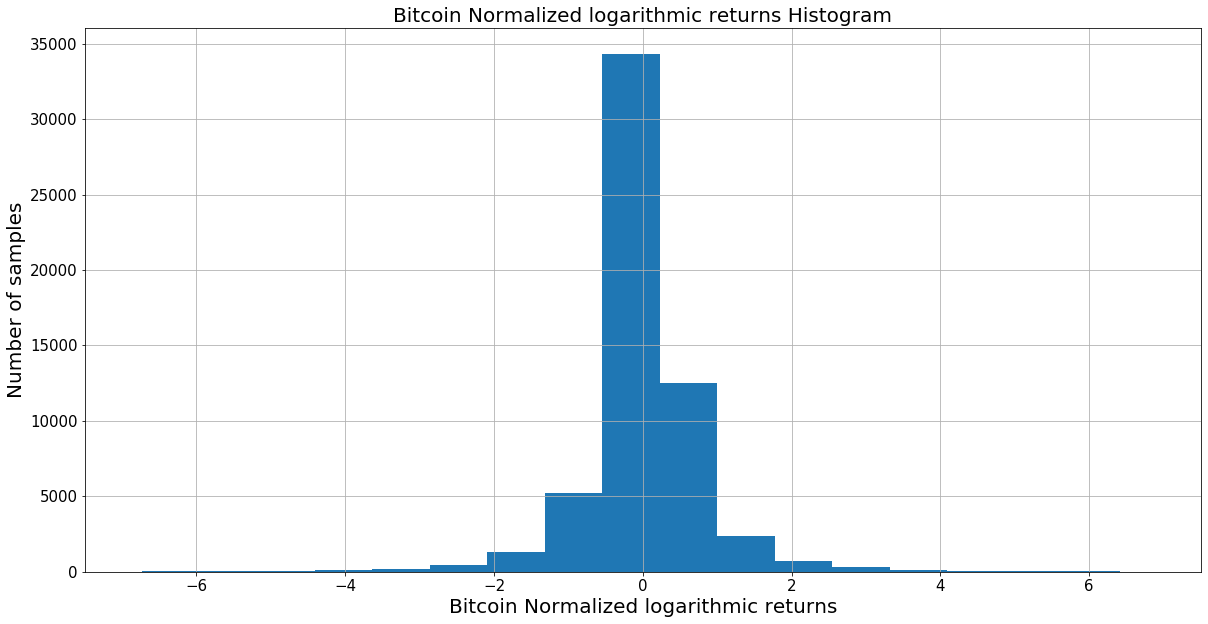

In [13]:
bitcoin['Normalized logarithmic returns'].plot(kind='hist', figsize=(20,10), grid=True, bins=100, xlim=(-7.5,7.5))
plt.xlabel("Bitcoin Normalized logarithmic returns", fontsize=20)
plt.title("Bitcoin Normalized logarithmic returns Histogram", fontsize=20)
plt.ylabel("Number of samples", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text yticklabel objects>)

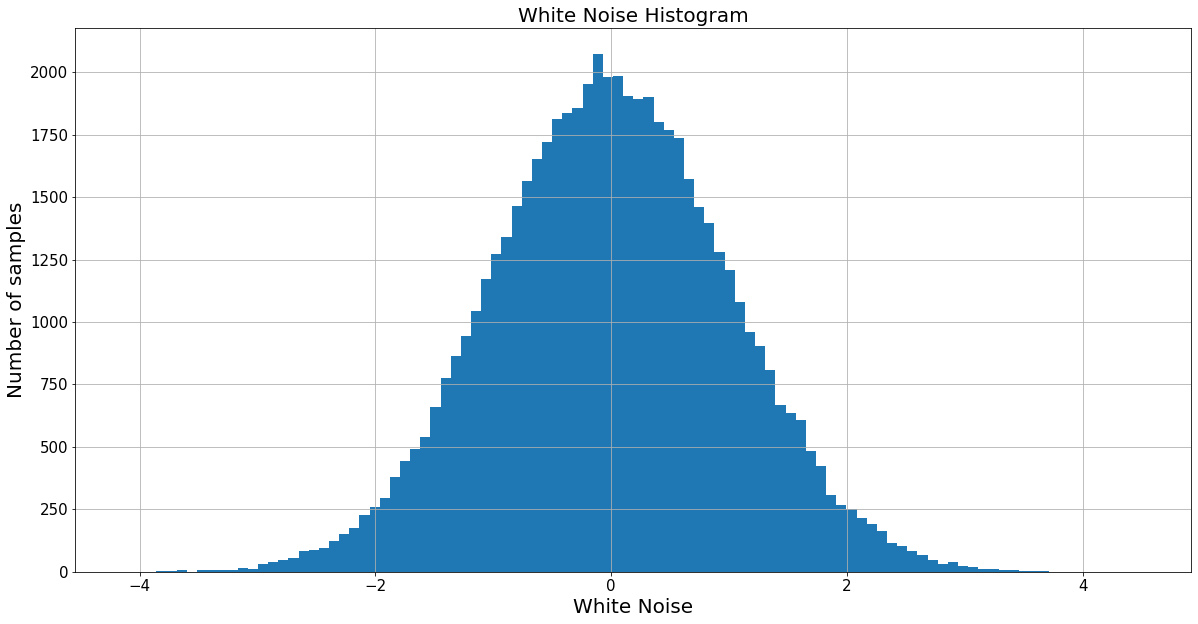

In [14]:
white_noise['White Noise'].plot(kind='hist', figsize=(20,10), grid=True, bins=100)
plt.xlabel("White Noise", fontsize=20)
plt.title("White Noise Histogram", fontsize=20)
plt.ylabel("Number of samples", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

2. Znormalizowanie histogramów(suma wartości słupków powinna być równa 1).

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text yticklabel objects>)

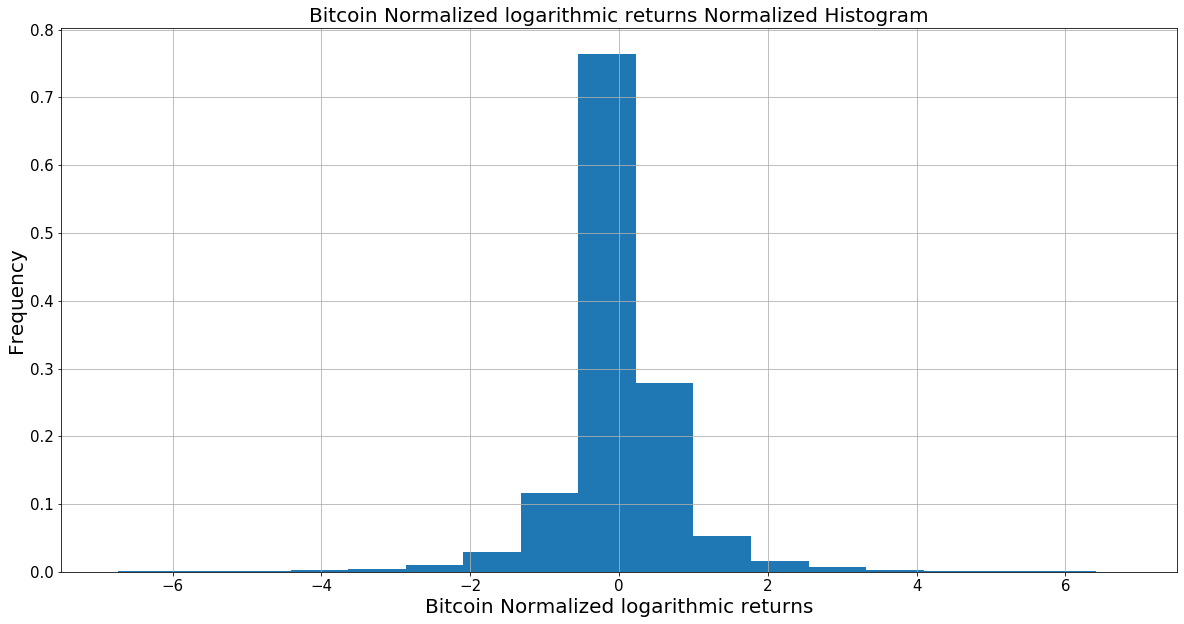

In [15]:
bitcoin['Normalized logarithmic returns'].plot(kind='hist', figsize=(20,10), density=True, grid=True, bins=100, xlim=(-7.5,7.5))
plt.xlabel("Bitcoin Normalized logarithmic returns", fontsize=20)
plt.title("Bitcoin Normalized logarithmic returns Normalized Histogram", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

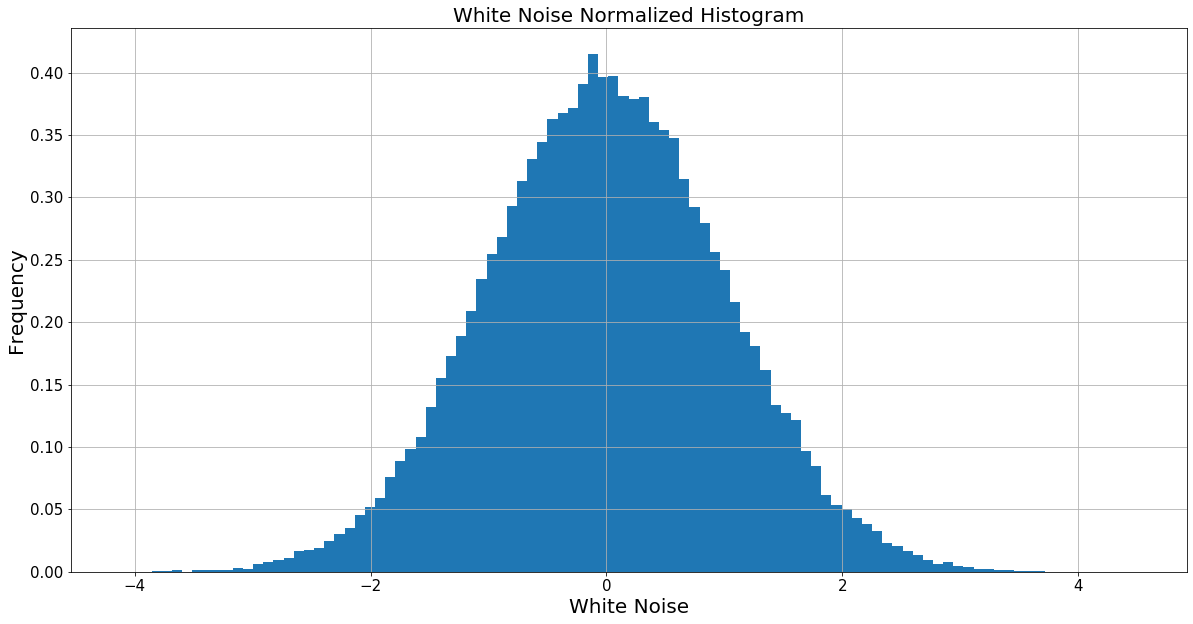

In [16]:
white_noise['White Noise'].plot(kind='hist', figsize=(20,10), density=True, grid=True, bins=100)
plt.xlabel("White Noise", fontsize=20)
plt.title("White Noise Normalized Histogram", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

3. Policzenie parametrów rozkładów(skośności oraz kurtozy).

In [17]:
print('Bitcoin skew: ', bitcoin['Open'].skew())

Bitcoin skew:  1.0857354294782657


In [18]:
print('Bitcoin kurtosis: ', bitcoin['Open'].kurtosis())

Bitcoin kurtosis:  1.166131830534138


In [19]:
print('White Noise skew: ', white_noise['White Noise'].skew())

White Noise skew:  0.007280664606550899


In [20]:
print('White Noise kurtosis: ', white_noise['White Noise'].kurtosis())

White Noise kurtosis:  0.002535971846076457


4. Przedstawienie obu znormalizowanych rozkładów na jednym wykresie. 

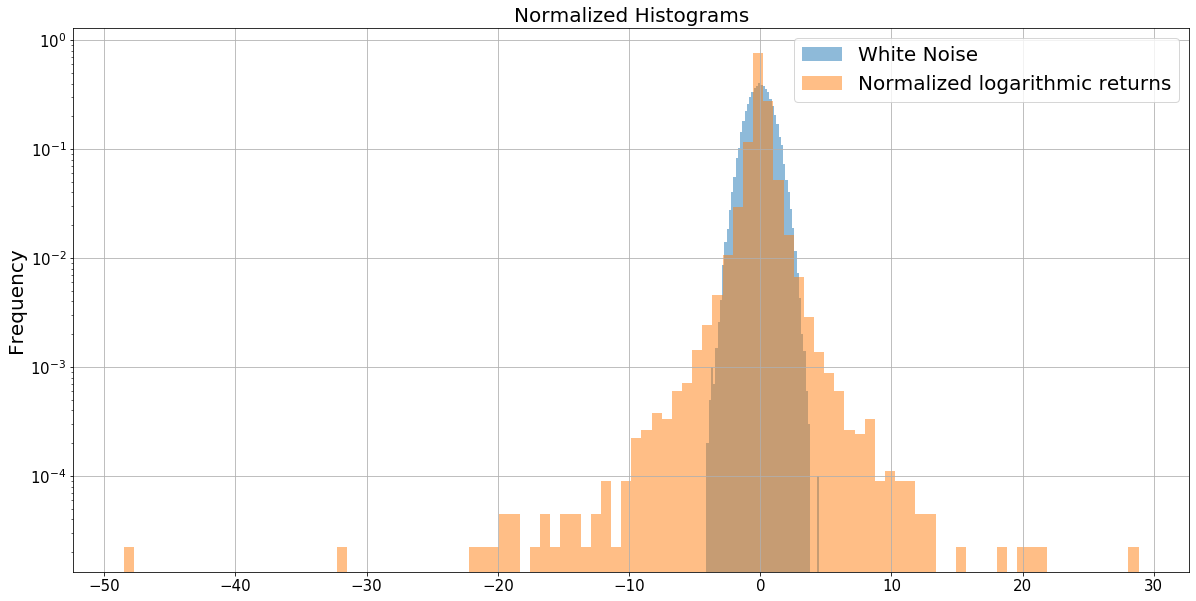

In [21]:
ax = white_noise['White Noise'].plot(kind='hist', figsize=(20,10), density=True, grid=True, bins=50, alpha=0.5)
bitcoin['Normalized logarithmic returns'].plot(ax=ax, kind='hist', figsize=(20,10), density=True, title='Normalized Histograms', grid=True, bins=100,alpha=0.5)
plt.legend(prop={'size': 20})
plt.title("Normalized Histograms", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log")

5. Policzenie rozkładu skumulowanego (1-dystrybuanta)  dla  modułu  fluktuacji (rozważyć oba szeregi).

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text yticklabel objects>)

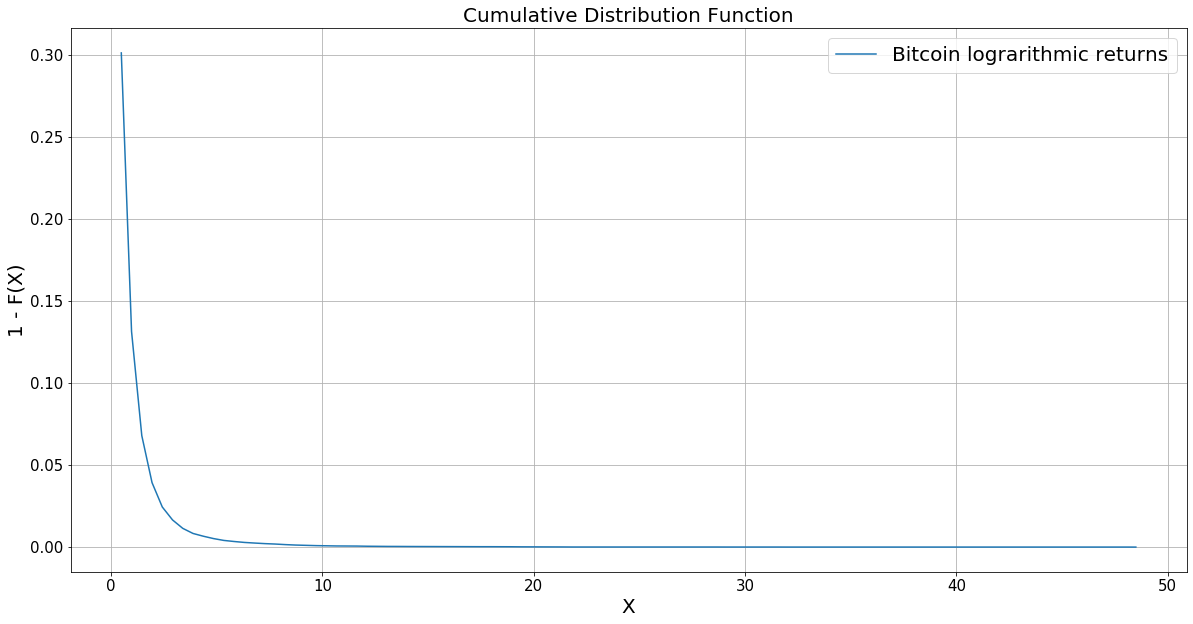

In [22]:
count, bins_count = np.histogram(abs(bitcoin['Normalized logarithmic returns'].dropna()), bins=100)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting CDF
plt.figure(figsize=(20,10))
plt.plot(bins_count[1:], 1-cdf, label="Bitcoin lograrithmic returns")
plt.title("Cumulative Distribution Function", fontsize=20)
plt.ylabel("1 - F(X)", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.grid()
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

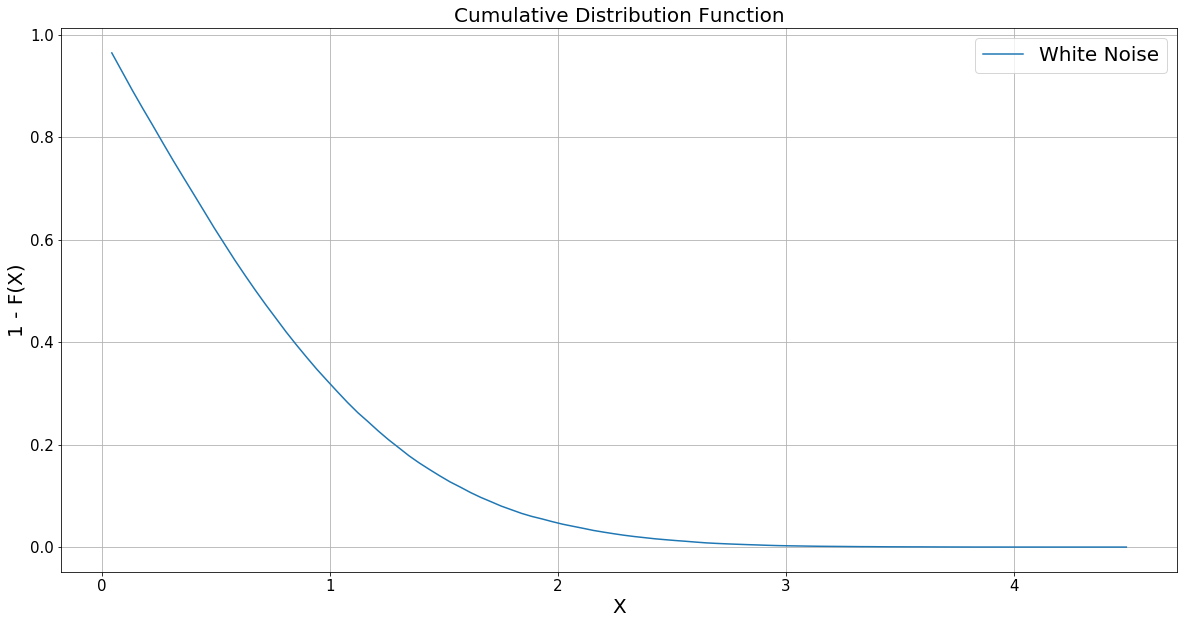

In [23]:
count_wn, bins_count_wn = np.histogram(abs(white_noise['White Noise']), bins=100)
# finding the PDF of the histogram using count values
pdf_wn = count_wn / sum(count_wn)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf_wn = np.cumsum(pdf_wn)
  
# plotting CDF
plt.figure(figsize=(20,10))
plt.plot(bins_count_wn[1:], 1-cdf_wn, label="White Noise")
plt.title("Cumulative Distribution Function", fontsize=20)
plt.ylabel("1 - F(X)", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.grid()
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

6. Przedstawienie obu rozkładów skumulowanych na jednym wykresie(w skali log-log).

(array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
        1.e+01, 1.e+02]),
 <a list of 10 Text yticklabel objects>)

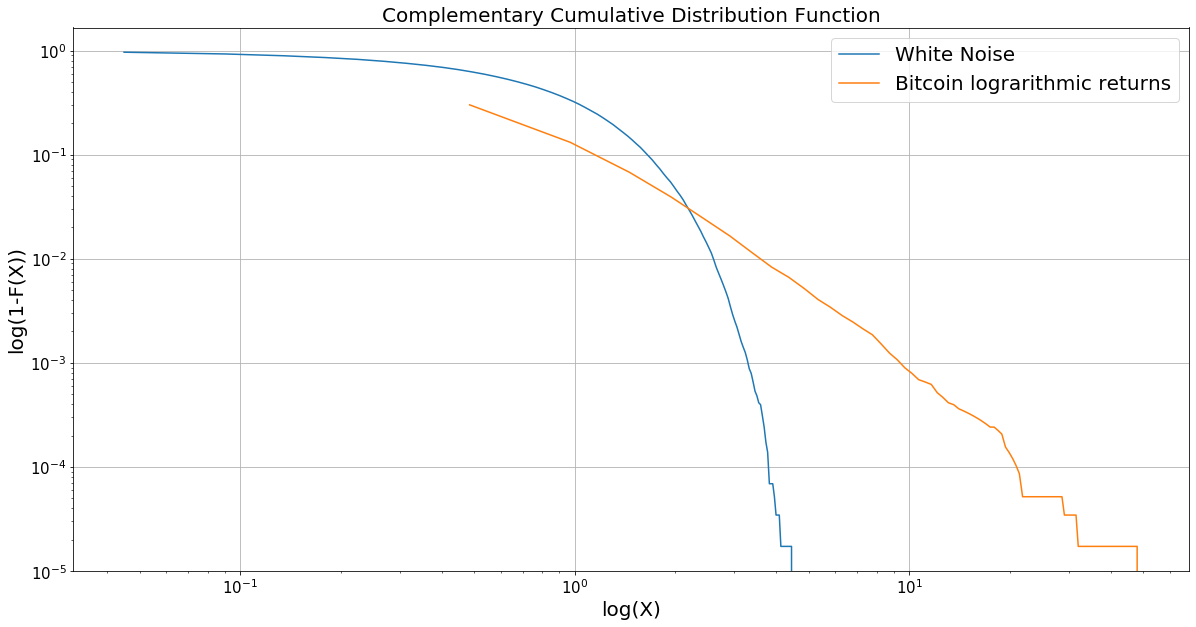

In [24]:
count, bins_count = np.histogram(abs(bitcoin['Normalized logarithmic returns'].dropna()), bins=100)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

count_wn, bins_count_wn = np.histogram(abs(white_noise['White Noise']), bins=100)
# finding the PDF of the histogram using count values
pdf_wn = count_wn / sum(count_wn)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf_wn = np.cumsum(pdf_wn)
  
# plotting 1 - CDF
plt.figure(figsize=(20,10))
plt.plot(bins_count_wn[1:], 1-cdf_wn, label="White Noise")
plt.plot(bins_count[1:], 1-cdf, label="Bitcoin lograrithmic returns")
plt.ylabel("log(1-F(X))", fontsize=20)
plt.xlabel("log(X)", fontsize=20)
plt.title("Complementary Cumulative Distribution Function", fontsize=20)
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### Temat 4

1. Dla danych giełdowych (stopy zwrotu) i wygenerowanych (biały szum) policzenie
funkcji autokorelacji.
2. Policzenie funkcji autokorelacji dla modułu stóp zwrotu oraz modułu danych
wygenerowanych. Sporządzenie odpowiedniego wykresu.
3. Policzenie widma mocy dla danych giełdowych (stopy zwrotu) i wygenerowanych
(biały szum).
4. Policzenie widma mocy dla modułu stóp zwrotu oraz modułu danych
wygenerowanych. Sporządzenie odpowiedniego wykresu. 

1. Dla danych giełdowych (stopy zwrotu) i wygenerowanych (biały szum) policzenie
funkcji autokorelacji.